EXPLORATORY DATA ANALYSIS ON WALMART

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
mart = pd.read_excel(r"c:\Users\Nafisa\Documents\Walmart.xlsx")
mart.head()

,Invoice_ID,Branch,City,Customer_Type,Gender,Product_Line,Unit_Price,Quantity,Tax_5%,Total,Date,Time,Payment,cogs,gross_Margin_Percentage,gross_Income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
mart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice_ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer_Type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product_Line             1000 non-null   object        
 6   Unit_Price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax_5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [5]:
mart.isna().sum() # No null values

Invoice_ID                 0
Branch                     0
City                       0
Customer_Type              0
Gender                     0
Product_Line               0
Unit_Price                 0
Quantity                   0
Tax_5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross_Margin_Percentage    0
gross_Income               0
Rating                     0
dtype: int64

In [6]:
mart.duplicated().sum()

np.int64(0)

In [7]:
# Checking for unique values in a column, to see if i have to standardize any column.
mart['Branch'].unique()
mart['City'].unique()
mart['Customer_Type'].unique()
mart['Gender'].unique()
mart['Payment'].unique()
mart['Product_Line'].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

In [8]:
print("The starting date was " + str(min(mart['Date'])))
print("The closing date was " + str(max(mart['Date'])))
print("The total sales made is " + str(np.sum(mart['Total'])))

The starting date was 2019-01-01 00:00:00
The closing date was 2019-03-30 00:00:00
The total sales made is 322966.749


In [9]:
# Let us look for the outliers
q1 = np.quantile(mart['Total'], 0.25)
q3 = np.quantile(mart['Total'], 0.75)
iqr = q3 - q1
print("IQR " , iqr)
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
print(f"Lower bound for outliers: {lower}")
print(f"Upper bound for outliers: {upper}")
outliers = mart[(mart['Total'] < lower) | (mart['Total'] > upper)]
outliers

IQR  346.927875
Lower bound for outliers: -395.9694375
Upper bound for outliers: 991.7420625


,Invoice_ID,Branch,City,Customer_Type,Gender,Product_Line,Unit_Price,Quantity,Tax_5%,Total,Date,Time,Payment,cogs,gross_Margin_Percentage,gross_Income,Rating
166,234-65-2137,C,Naypyitaw,Normal,Male,Home and lifestyle,95.58,10,47.790,1003.590,2019-01-16,13:32:00,Cash,955.8,4.761905,47.790,4.8
167,687-47-8271,A,Yangon,Normal,Male,Fashion accessories,98.98,10,49.490,1039.290,2019-02-08,16:20:00,Credit card,989.8,4.761905,49.490,8.7
350,860-79-0874,C,Naypyitaw,Member,Female,Fashion accessories,99.30,10,49.650,1042.650,2019-02-15,14:53:00,Credit card,993.0,4.761905,49.650,6.6
357,554-42-2417,C,Naypyitaw,Normal,Female,Sports and travel,95.44,10,47.720,1002.120,2019-01-09,13:45:00,Cash,954.4,4.761905,47.720,5.2
422,271-88-8734,C,Naypyitaw,Member,Female,Fashion accessories,97.21,10,48.605,1020.705,2019-02-08,13:00:00,Credit card,972.1,4.761905,48.605,8.7
557,283-26-5248,C,Naypyitaw,Member,Female,Food and beverages,98.52,10,49.260,1034.460,2019-01-30,20:23:00,Ewallet,985.2,4.761905,49.260,4.5
699,751-41-9720,C,Naypyitaw,Normal,Male,Home and lifestyle,97.50,10,48.750,1023.750,2019-01-12,16:18:00,Ewallet,975.0,4.761905,48.750,8.0
792,744-16-7898,B,Mandalay,Normal,Female,Home and lifestyle,97.37,10,48.685,1022.385,2019-01-15,13:48:00,Credit card,973.7,4.761905,48.685,4.9
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.690,1022.490,2019-03-02,17:16:00,Ewallet,973.8,4.761905,48.690,4.4


In [10]:
no_more_outlier = mart[(mart['Total'] >= lower) & (mart['Total'] <= upper)]
no_more_outlier = no_more_outlier.copy()
# Showing that no_more_outlier is a subset of mart.
no_more_outlier['Date'] = no_more_outlier['Date'].dt.date
no_more_outlier.head()

,Invoice_ID,Branch,City,Customer_Type,Gender,Product_Line,Unit_Price,Quantity,Tax_5%,Total,Date,Time,Payment,cogs,gross_Margin_Percentage,gross_Income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


In [11]:
# no_more_outlier is a new dataframe, so i have to convert date into datetime column.
no_more_outlier['Date'] = pd.to_datetime(no_more_outlier['Date'])

In [12]:
no_more_outlier['Month'] = pd.to_datetime(no_more_outlier['Date']).dt.strftime('%B')
# Adding a month column

In [13]:
no_more_outlier['Day_num'] = pd.to_datetime(no_more_outlier['Date']).dt.strftime('%d')
no_more_outlier.sort_values(by = 'Date', inplace = True)

In [14]:
no_more_outlier.head()

,Invoice_ID,Branch,City,Customer_Type,Gender,Product_Line,Unit_Price,Quantity,Tax_5%,Total,Date,Time,Payment,cogs,gross_Margin_Percentage,gross_Income,Rating,Month,Day_num
856,770-42-8960,B,Mandalay,Normal,Male,Food and beverages,21.12,8,8.448,177.408,2019-01-01,19:31:00,Cash,168.96,4.761905,8.448,6.3,January,01
696,182-52-7000,A,Yangon,Member,Female,Sports and travel,27.04,4,5.408,113.568,2019-01-01,20:26:00,Ewallet,108.16,4.761905,5.408,6.9,January,01
450,891-01-7034,B,Mandalay,Normal,Female,Electronic accessories,74.71,6,22.413,470.673,2019-01-01,19:07:00,Cash,448.26,4.761905,22.413,6.7,January,01
839,271-77-8740,C,Naypyitaw,Member,Female,Sports and travel,29.22,6,8.766,184.086,2019-01-01,11:40:00,Ewallet,175.32,4.761905,8.766,5.0,January,01
17,765-26-6951,A,Yangon,Normal,Male,Sports and travel,72.61,6,21.783,457.443,2019-01-01,10:39:00,Credit card,435.66,4.761905,21.783,6.9,January,01


In [15]:
no_more_outlier['Month'].unique()

array(['January', 'February', 'March'], dtype=object)

In [16]:
print(plt.style.available)
plt.style.use('tableau-colorblind10')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


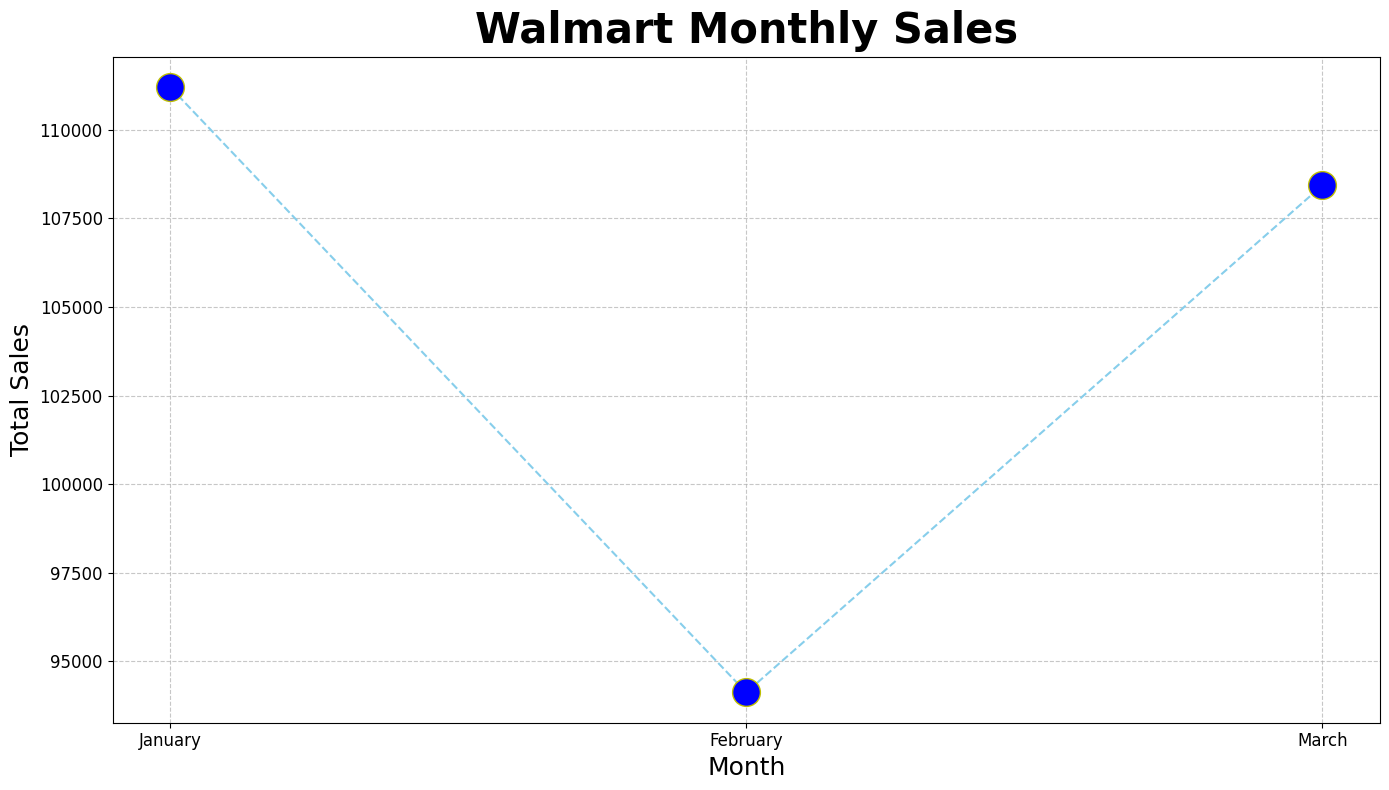

In [17]:
mon_order = ['January', 'February', 'March']
# Convert the month into a category
no_more_outlier['Month'] = pd.Categorical(no_more_outlier['Month'], categories = mon_order, ordered = True)
mon_sales = no_more_outlier.groupby(no_more_outlier['Month'], observed = False)['Total'].sum().reset_index()
# To see the total sales for each month, i had to group by month 
# and apply reset_index() to convert the series into a dataframe.
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
ax.plot(mon_sales['Month'], mon_sales['Total'], linestyle = '--', color = 'skyblue', marker = 'o', mfc = "b", mec = 'y', ms = 20)
ax.set_title("Walmart Monthly Sales", fontsize = 30, fontweight = 'bold', pad = 10)
ax.set_xlabel("Month", fontsize = 18)
ax.set_ylabel("Total Sales", fontsize = 18)
ax.tick_params(axis = 'both', labelsize  = 12)
ax.grid(True, linestyle='--', alpha=0.7)
fig.tight_layout()
plt.show()

In [18]:
print(f"Average Sale is {np.mean(no_more_outlier['Total'])}")
print(f"50% Sale is {np.median(no_more_outlier['Total'])}")
print(f"STD Sale is {np.std(no_more_outlier['Total'], ddof = 1)}")

Average Sale is 316.60475176589307
50% Sale is 252.756
STD Sale is 237.70958941235062


Moving average :It shows the average price for over some number of days. This way, you don’t get distracted by small ups and downs, and you can see the overall trend better. This moving average will show the average sales for each day in each month.

In [19]:
no_more_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Index: 991 entries, 856 to 643
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice_ID               991 non-null    object        
 1   Branch                   991 non-null    object        
 2   City                     991 non-null    object        
 3   Customer_Type            991 non-null    object        
 4   Gender                   991 non-null    object        
 5   Product_Line             991 non-null    object        
 6   Unit_Price               991 non-null    float64       
 7   Quantity                 991 non-null    int64         
 8   Tax_5%                   991 non-null    float64       
 9   Total                    991 non-null    float64       
 10  Date                     991 non-null    datetime64[ns]
 11  Time                     991 non-null    object        
 12  Payment                  991 non-null  

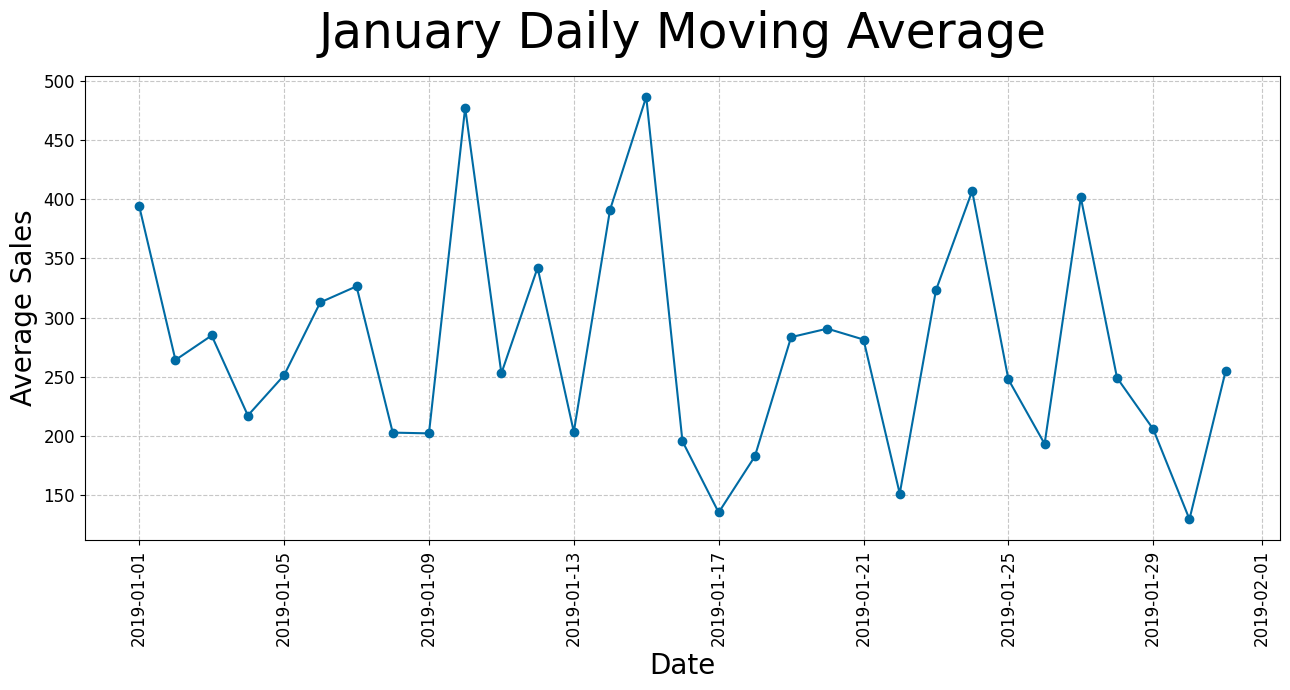

In [20]:
# To calculate the moving average for each day in january
jan_data = no_more_outlier[no_more_outlier['Month'] == "January"]
# i grouped the data by date to get the avg sales for each day

# Group by date and sum the Total column
jan_daily_avg = jan_data.groupby('Date')['Total'].median().reset_index()

# Sort by date to ensure chronological order
jan_daily_avg = jan_daily_avg.sort_values('Date')

# Plot the results
fig, ax = plt.subplots()
fig.set_size_inches(13, 7)
ax.plot(jan_daily_avg['Date'], jan_daily_avg['Total'], marker = 'o')
plt.xticks(rotation = 90)
ax.set_xlabel("Date", fontsize = 20)
ax.set_ylabel("Average Sales", fontsize = 20) 
ax.set_title("January Daily Moving Average", fontsize = 35, pad = 20)
ax.grid(True, alpha = 0.7, linestyle = '--')
ax.tick_params(axis = 'both', labelsize = 12)
fig.tight_layout()
plt.show()

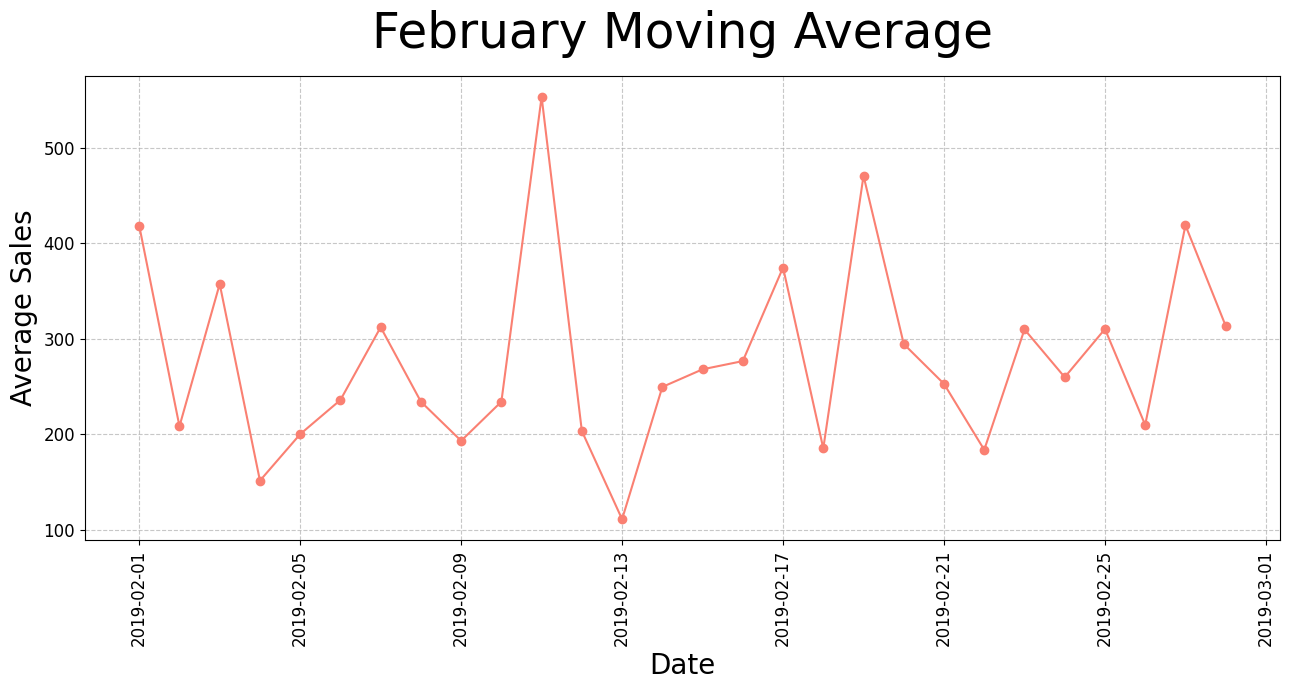

In [21]:
# February moving average
feb_data = no_more_outlier[no_more_outlier['Month'] == "February"]
feb_daily_sales = feb_data.groupby('Date')['Total'].median().reset_index()
feb_daily_sales.sort_values('Date', inplace = True)

fig, ax = plt.subplots()
fig.set_size_inches(13, 7)
ax.plot(feb_daily_sales['Date'], feb_daily_sales['Total'], marker = 'o', color = 'salmon')
ax.grid(True, alpha = 0.7, linestyle = '--')
ax.set_xlabel("Date", fontsize = 20)
ax.set_ylabel("Average Sales", fontsize = 20)
ax.set_title("February Moving Average", fontsize = 35, pad = 20)
ax.tick_params(axis = 'both', labelsize = 12)
plt.xticks(rotation = 90)
fig.tight_layout()
plt.show()

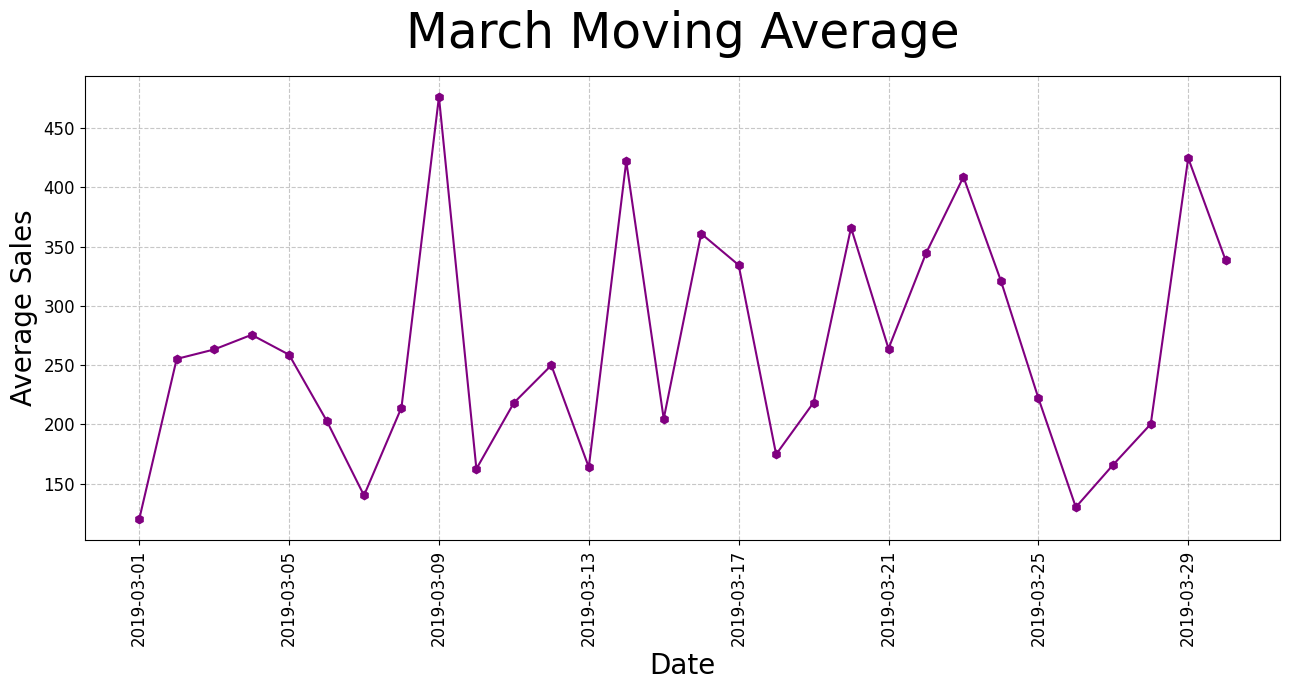

In [22]:
march_data = no_more_outlier[no_more_outlier['Month'] == "March"]
march_daily_sales = march_data.groupby('Date')['Total'].median().reset_index()
march_daily_sales.sort_values('Date', inplace = True)

fig, ax = plt.subplots()
fig.set_size_inches(13, 7)
ax.plot(march_daily_sales['Date'], march_daily_sales['Total'], marker = 'h', color = 'purple')
ax.grid(True, alpha = 0.7, linestyle = '--')
ax.set_xlabel("Date", fontsize = 20)
ax.set_ylabel("Average Sales", fontsize = 20)
ax.set_title("March Moving Average", fontsize = 35, pad = 20)
ax.tick_params(axis = 'both', labelsize = 12)
plt.xticks(rotation = 90)
fig.tight_layout()
plt.xticks(rotation = 90)
plt.show()


In [23]:
no_more_outlier.head()

,Invoice_ID,Branch,City,Customer_Type,Gender,Product_Line,Unit_Price,Quantity,Tax_5%,Total,Date,Time,Payment,cogs,gross_Margin_Percentage,gross_Income,Rating,Month,Day_num
856,770-42-8960,B,Mandalay,Normal,Male,Food and beverages,21.12,8,8.448,177.408,2019-01-01,19:31:00,Cash,168.96,4.761905,8.448,6.3,January,01
696,182-52-7000,A,Yangon,Member,Female,Sports and travel,27.04,4,5.408,113.568,2019-01-01,20:26:00,Ewallet,108.16,4.761905,5.408,6.9,January,01
450,891-01-7034,B,Mandalay,Normal,Female,Electronic accessories,74.71,6,22.413,470.673,2019-01-01,19:07:00,Cash,448.26,4.761905,22.413,6.7,January,01
839,271-77-8740,C,Naypyitaw,Member,Female,Sports and travel,29.22,6,8.766,184.086,2019-01-01,11:40:00,Ewallet,175.32,4.761905,8.766,5.0,January,01
17,765-26-6951,A,Yangon,Normal,Male,Sports and travel,72.61,6,21.783,457.443,2019-01-01,10:39:00,Credit card,435.66,4.761905,21.783,6.9,January,01


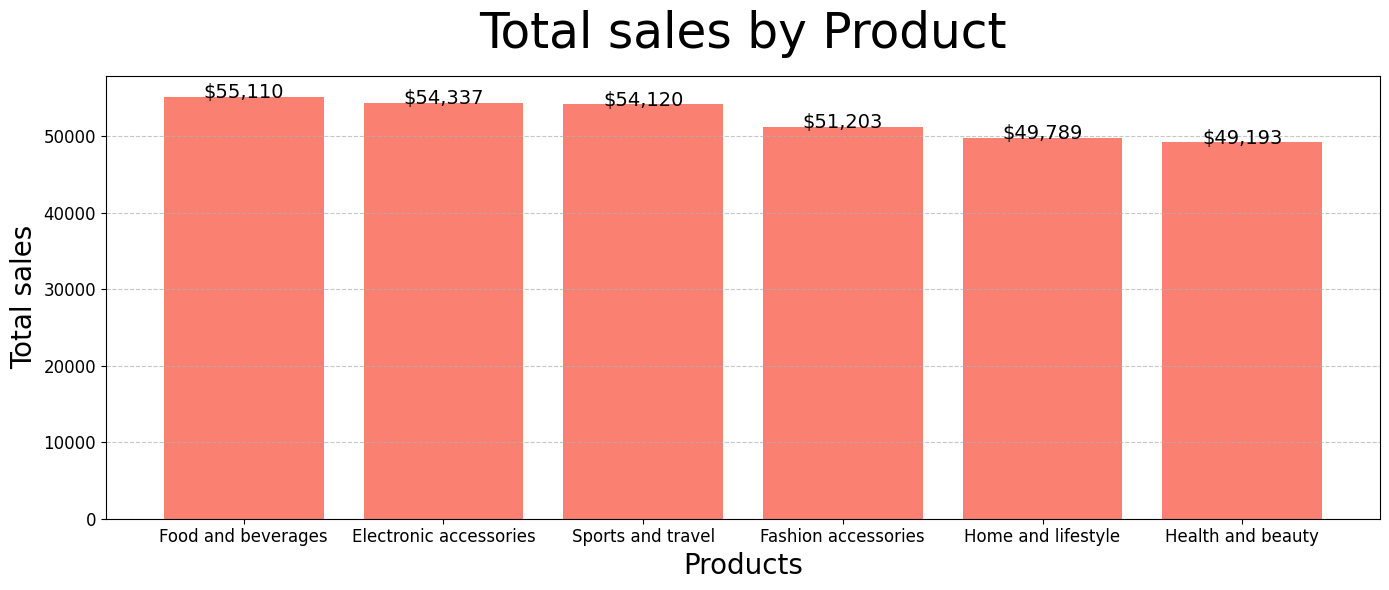

In [24]:
product_sales = no_more_outlier.groupby('Product_Line')['Total'].sum().reset_index()
product_sales.sort_values('Total', ascending = 0, inplace = True)

fig, ax = plt.subplots()
fig.set_size_inches(14, 6)
bars = ax.bar(product_sales['Product_Line'], product_sales['Total'], color = 'salmon')
plt.xticks(fontsize = 12)
ax.set_xlabel("Products", fontsize = 20)
ax.set_ylabel("Total sales", fontsize = 20)
ax.set_title("Total sales by Product", fontsize = 35, pad = 20)
ax.grid(axis = 'y', alpha = 0.7, linestyle = '--')
ax.tick_params(axis = 'both', labelsize = 12)
#Annotating each bar with corresponding value
for bar in bars:
     height = bar.get_height()
     width = bar.get_width()/2
     ax.text(bar.get_x() + width, height + (height * 0.01), f"${int(height):,}", ha = 'center', va = 'center', 
              fontsize = 14)

fig.tight_layout()
plt.show()

In [25]:
no_more_outlier['Quantity'].unique()

array([ 8,  4,  6, 10,  9,  2,  1,  5,  3,  7])

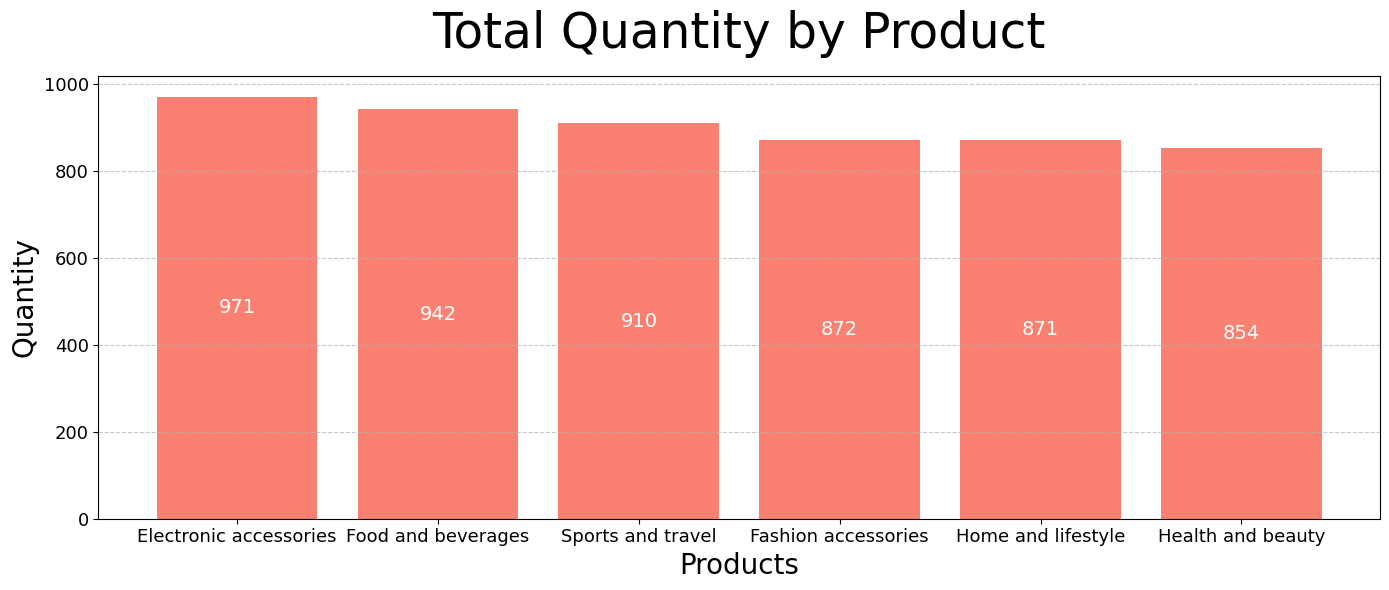

In [26]:
product_qty = no_more_outlier.groupby('Product_Line')['Quantity'].sum().reset_index()
product_qty.sort_values('Quantity', ascending = 0, inplace = True)

fig, ax = plt.subplots()
fig.set_size_inches(14, 6)
bars = ax.bar(product_qty['Product_Line'], product_qty['Quantity'], color = 'salmon')
plt.xticks(fontsize = 12)
ax.set_xlabel("Products", fontsize = 20)
ax.set_ylabel("Quantity", fontsize = 20)
ax.set_title("Total Quantity by Product", fontsize = 35, pad = 20)
ax.grid(axis = 'y', alpha = 0.7, linestyle = '--')
ax.tick_params(axis = 'both', labelsize = 13)
#Annotating each bar with corresponding value
for bar in bars:
     height = bar.get_height()
     width = bar.get_width()/2
     ax.text(bar.get_x() + width, (height * 0.5), f"{int(height):,}", ha = 'center', va = 'center', color = 'w', 
             fontsize = 14 )

fig.tight_layout()
plt.show()

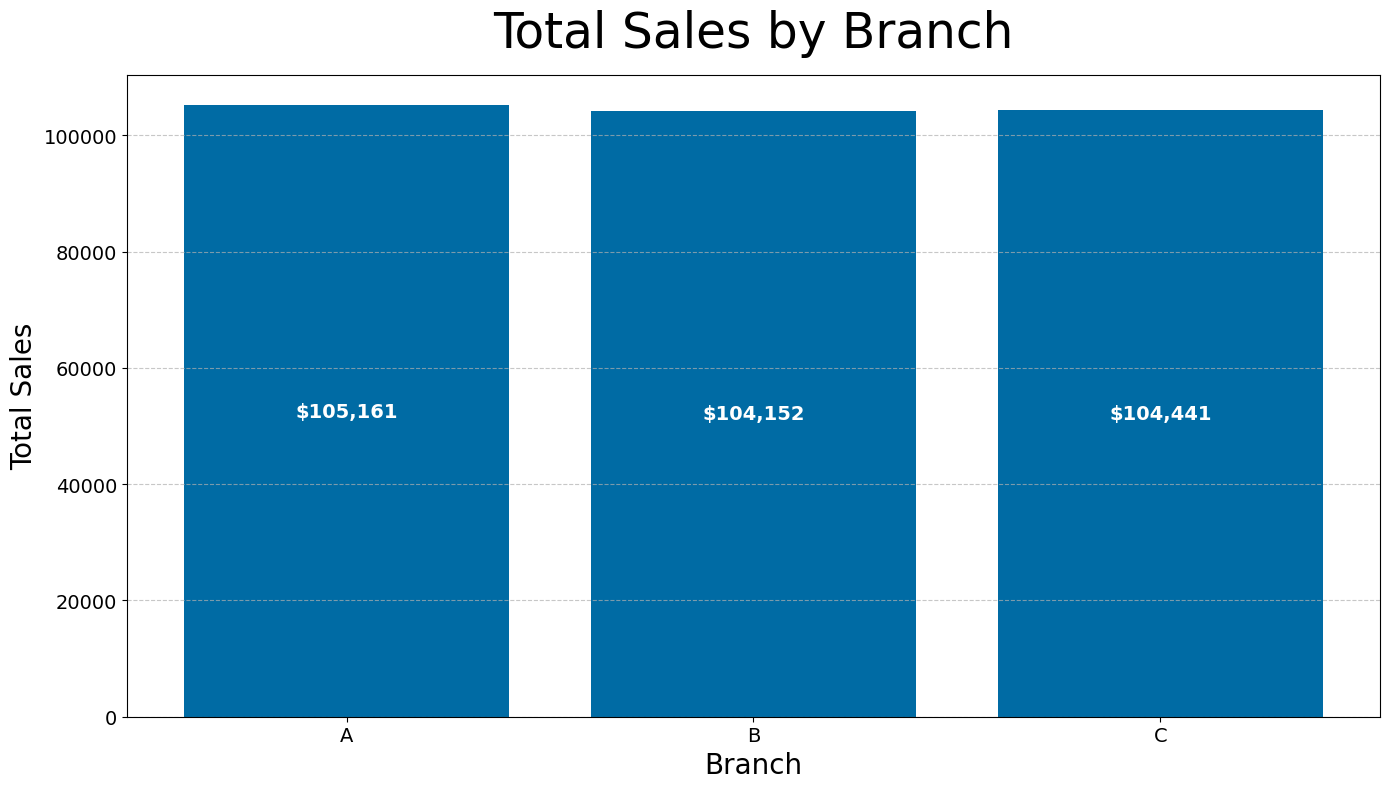

In [27]:

branch_sales = no_more_outlier.groupby('Branch')['Total'].sum().reset_index()
branch_sales.sort_values('Branch', inplace=True)

fig, ax = plt.subplots()
fig.set_size_inches(14, 8)

bars = ax.bar(branch_sales['Branch'], branch_sales['Total'])
ax.set_xlabel("Branch", fontsize=20)
ax.set_ylabel("Total Sales", fontsize=20)
ax.set_title("Total Sales by Branch", fontsize=35, pad=20)
ax.grid(axis = 'y', alpha=0.7, linestyle='--')
ax.tick_params(axis = 'both', labelsize=14)

for bar in bars:
    height = bar.get_height()
    width = bar.get_width() / 2
    ax.text(bar.get_x() + width, height * 0.5, f"${int(height):,}", ha='center', va='center', 
            fontsize=14, color='white', fontweight='bold')

fig.tight_layout()
plt.show()


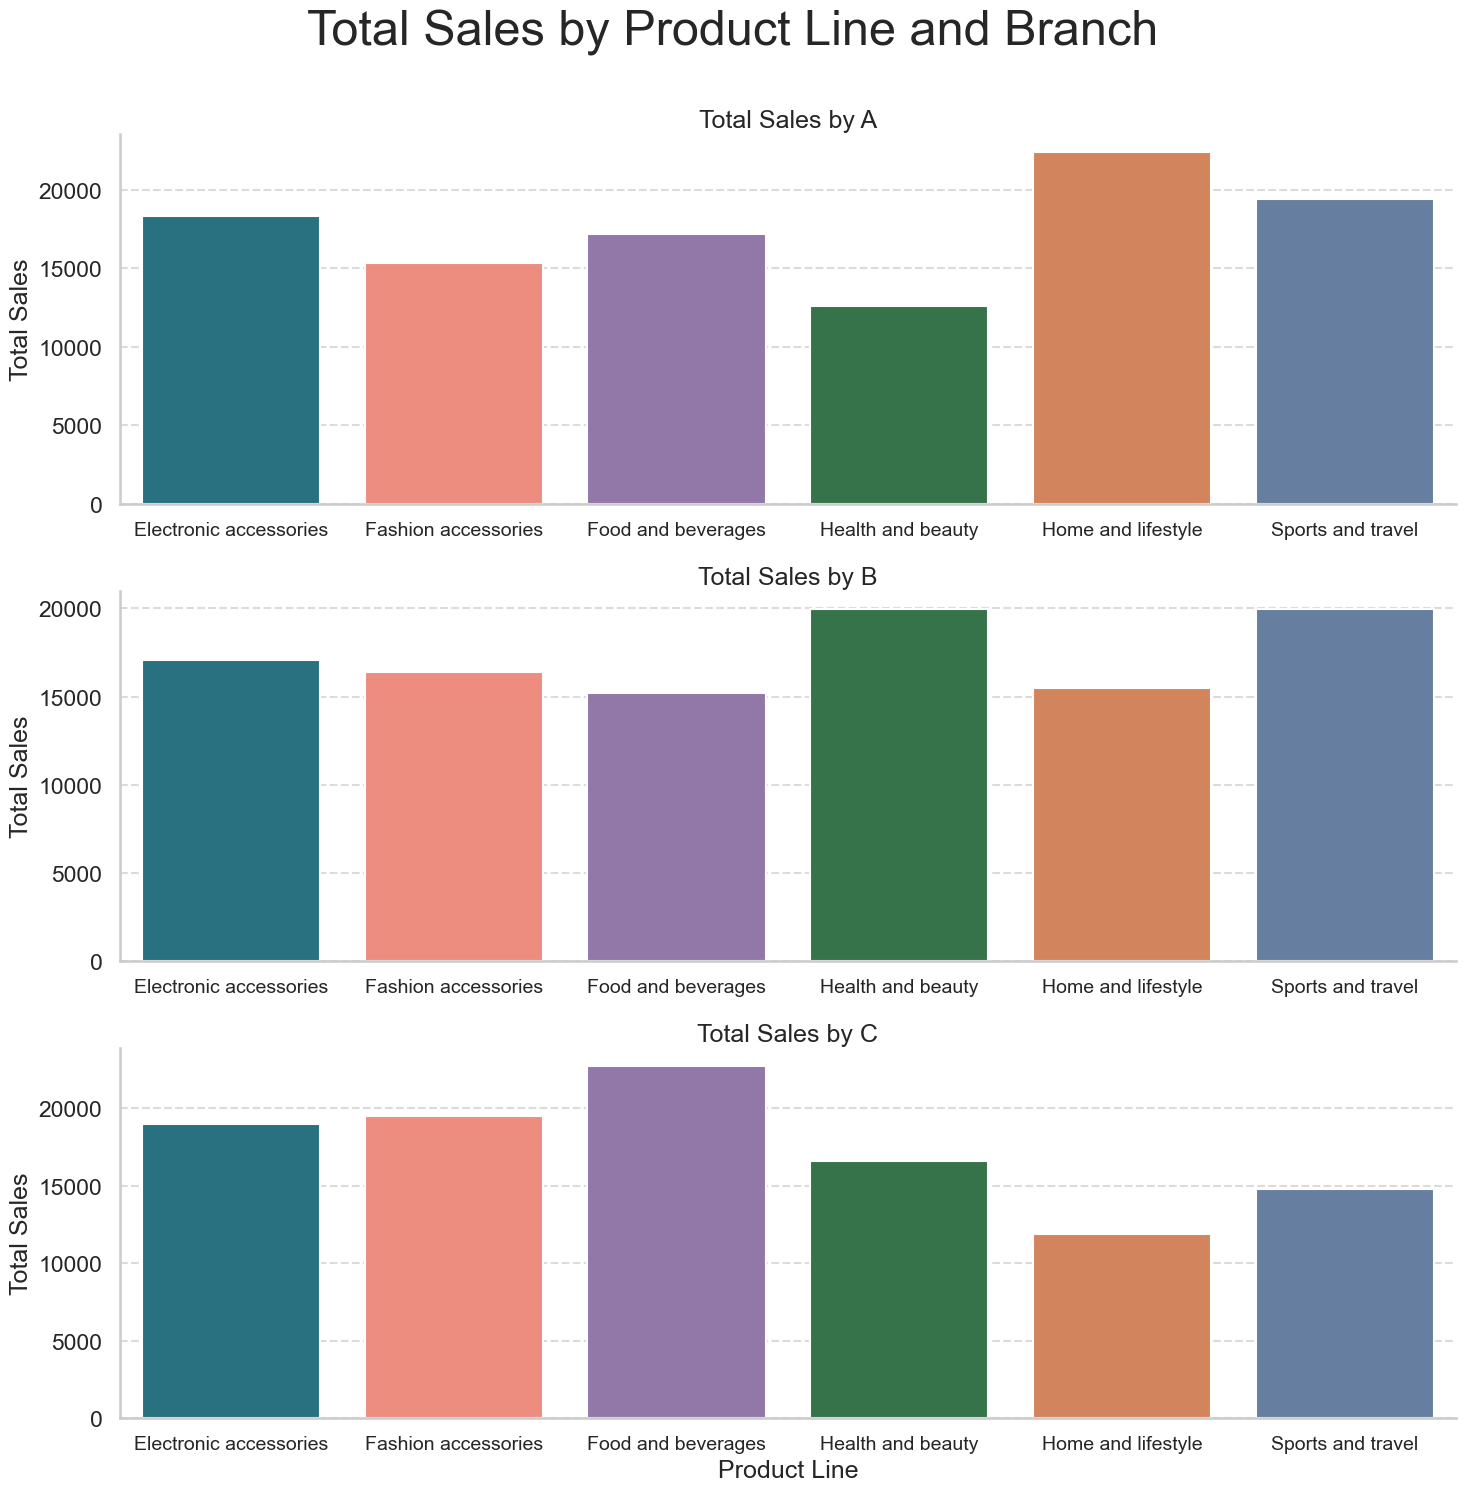

In [28]:
product_location = no_more_outlier.groupby(['Branch', 'Product_Line'])['Total'].sum().reset_index()
sns.set_style('whitegrid')
sns.set_context('talk')
colors = ["#1A7B8F", "#FF7F6E", "#9270B0", "#2D7D46", "#E67E49", "#5C7DAA"]
g = sns.catplot(x = 'Product_Line',  y = 'Total',  data = product_location, kind = "bar",  row = 'Branch',
                height = 5, aspect = 3, sharey = False, errorbar = None, hue = 'Product_Line', palette = colors)

g.set(xlabel = "Product Line", ylabel = "Total Sales")
g.fig.suptitle('Total Sales by Product Line and Branch', fontsize = 35, y = 1.00)
g.fig.subplots_adjust(hspace = 0.2)


# Set fontsize for x-axis tick labels without rotation
for ax, title in zip(g.axes.flatten(), g.row_names):
    plt.setp(ax.get_xticklabels(), fontsize = 14)
    ax.tick_params(axis='x', labelbottom=True, labelsize = 14)
    ax.set_title(f"Total Sales by {title}", pad = 5)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
g.tight_layout()   
plt.show()



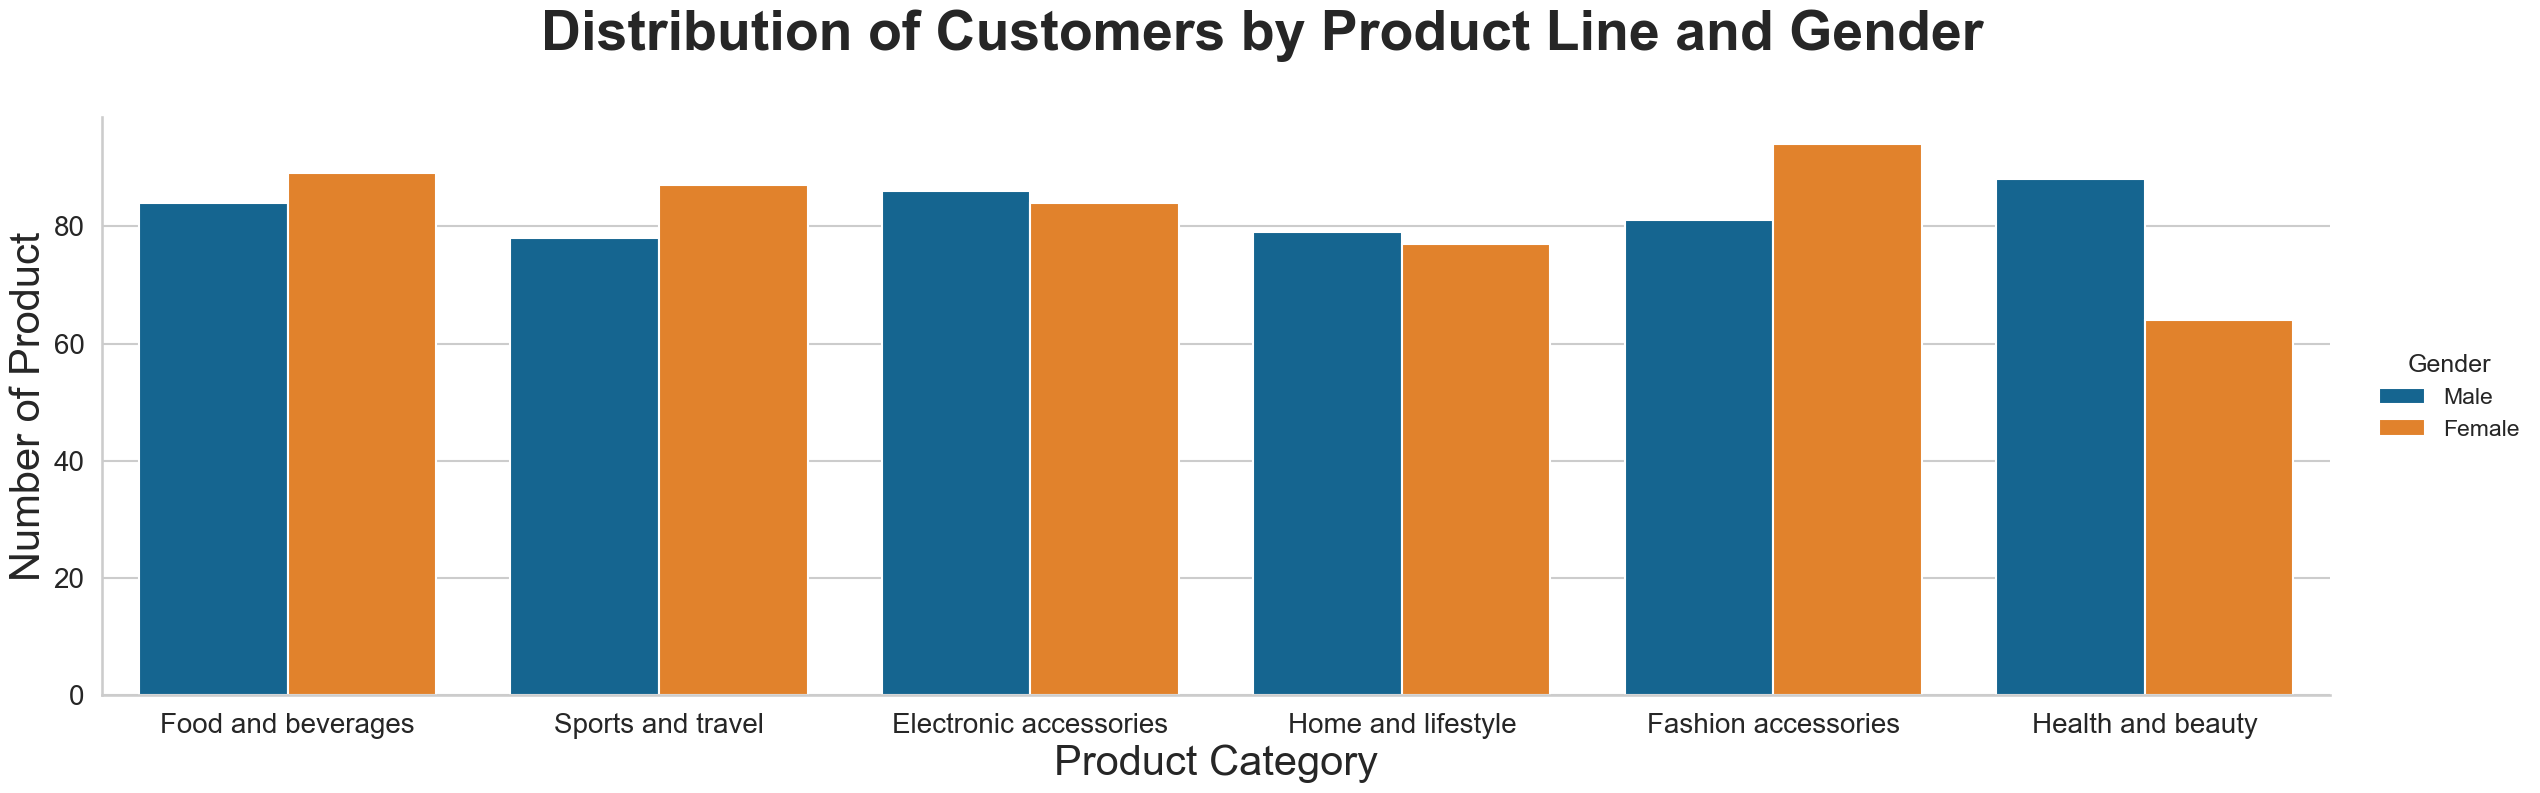

In [29]:
g = sns.catplot(x = 'Product_Line', data = no_more_outlier, kind = "count", height = 8,
                aspect = 3, hue = 'Gender')
g.fig.suptitle("Distribution of Customers by Product Line and Gender", fontsize = 40, y = 1.0, fontweight = 'bold')
g.tick_params(axis = 'both', labelsize = 20)
g.set_xlabels("Product Category", fontsize = 30)
g.set_ylabels("Number of Product", fontsize = 30)
g.tight_layout()
plt.show()

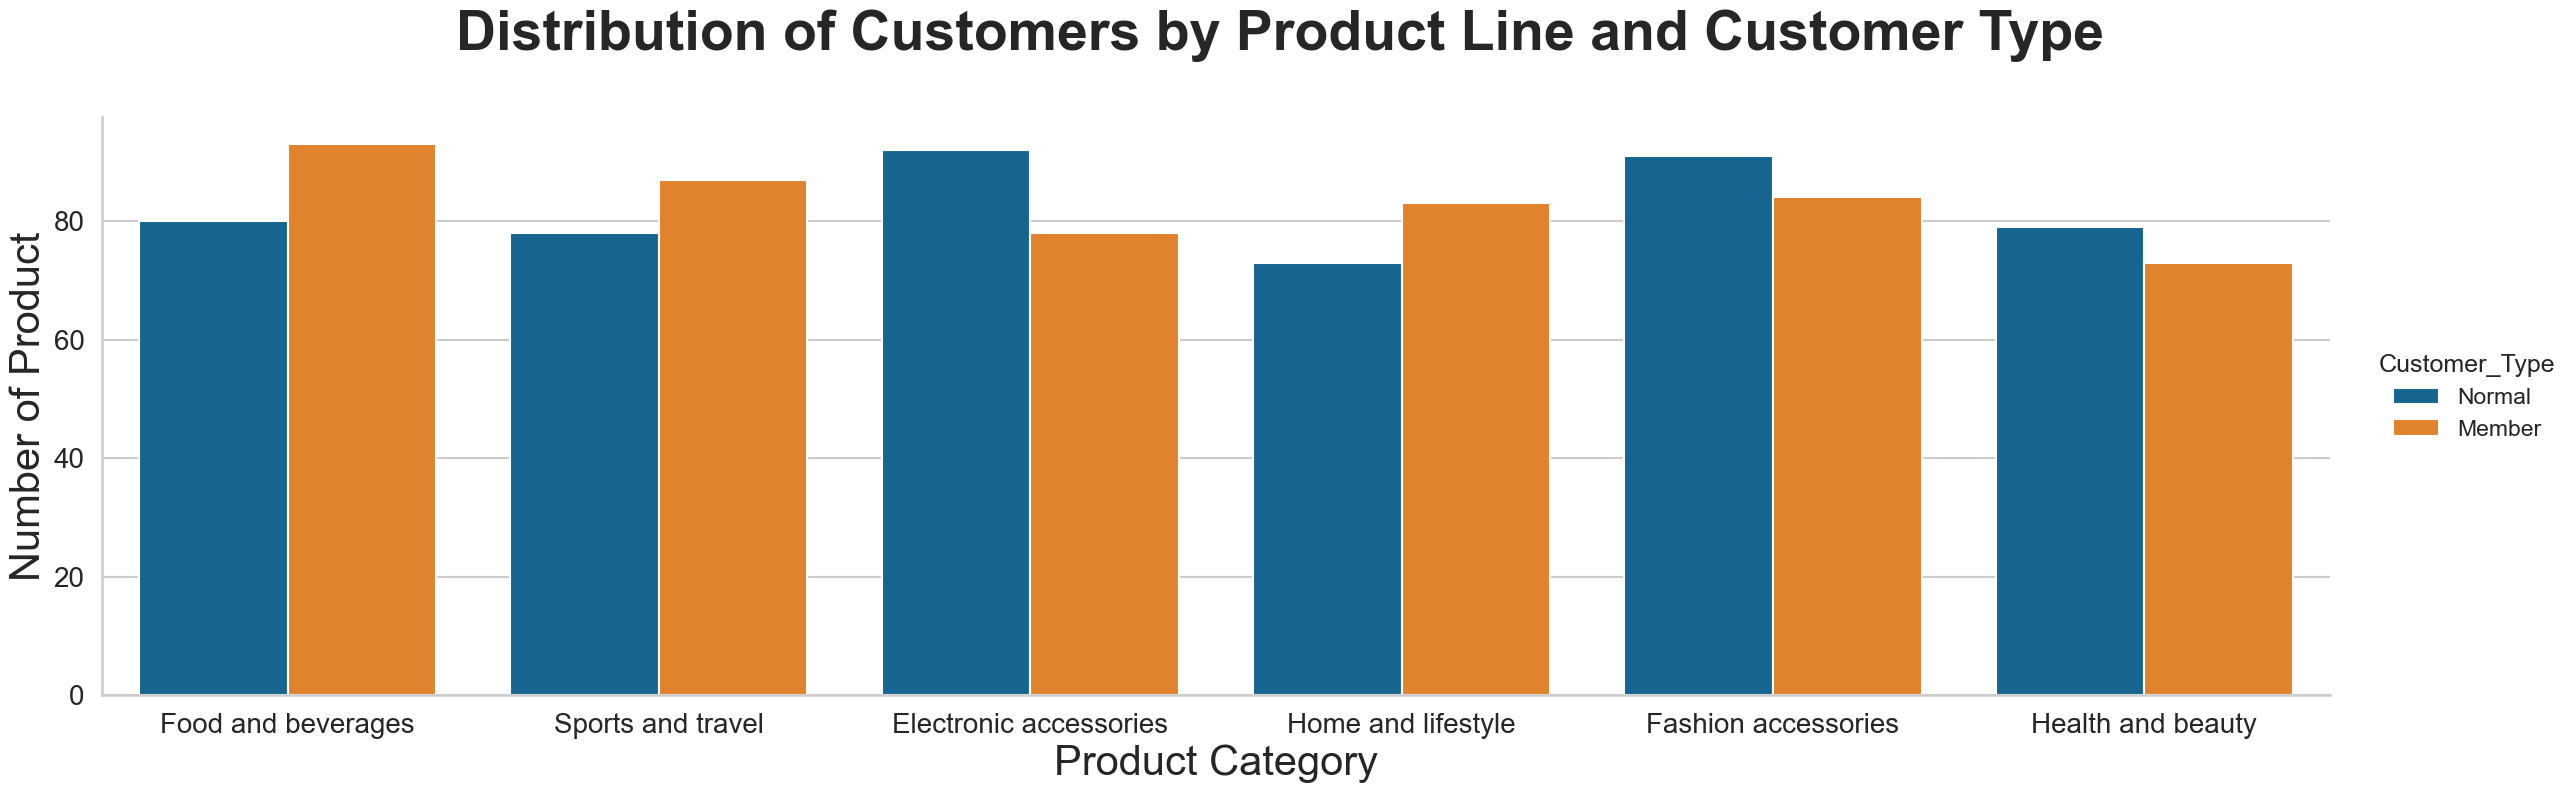

In [30]:
g = sns.catplot(x = 'Product_Line', data = no_more_outlier, kind = 'count', hue = 'Customer_Type',
                aspect = 3, height = 8)
g.fig.suptitle("Distribution of Customers by Product Line and Customer Type", fontsize = 40, fontweight = 'bold', y = 1.0)
g.set_xlabels("Product Category", fontsize = 30) 
g.set_ylabels("Number of Product", fontsize = 30)
g.tick_params(axis = 'both', labelsize = 20)
g.tight_layout()
plt.show()

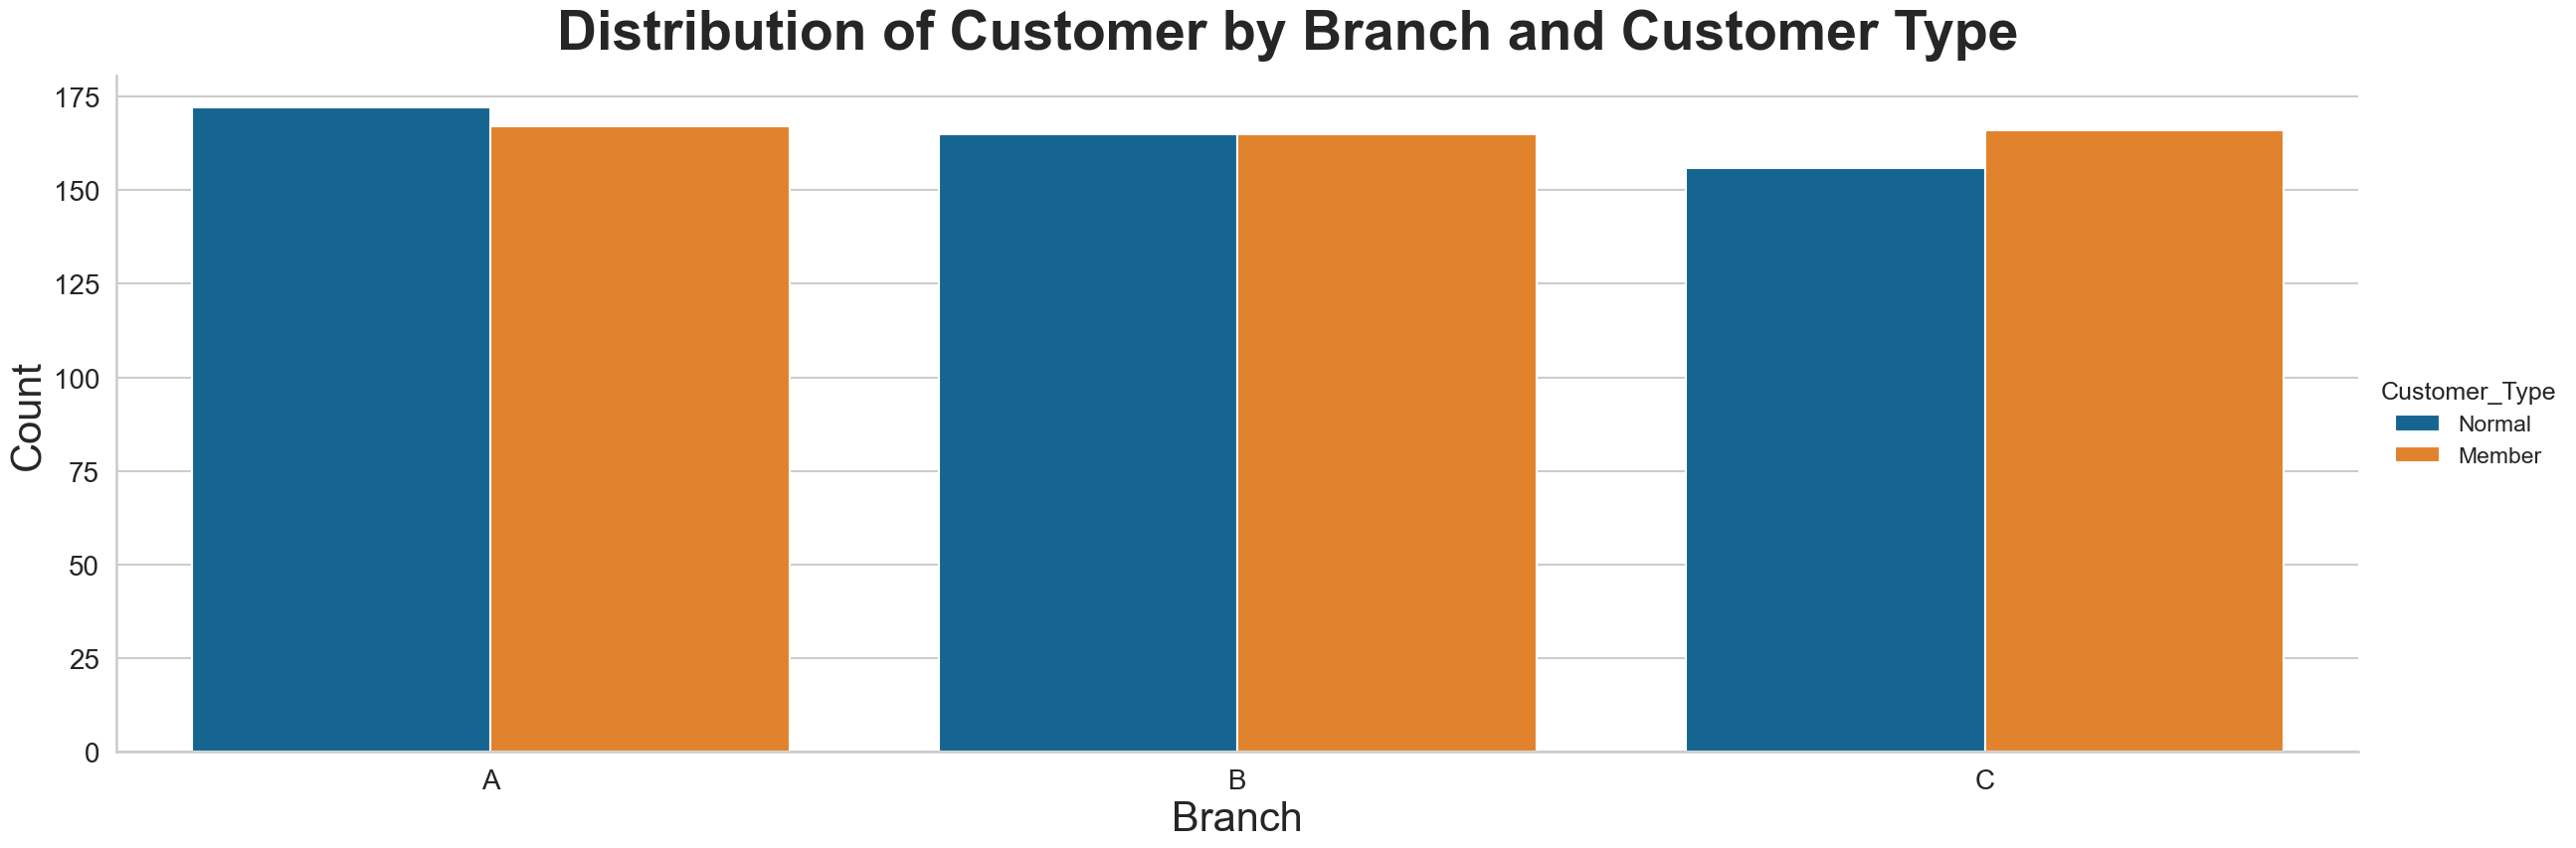

In [31]:
branch_order = ['A', 'B', 'C']
no_more_outlier['Branch'] = pd.Categorical(no_more_outlier['Branch'], categories = branch_order, ordered = True)
g = sns.catplot(x = 'Branch', data = no_more_outlier, kind = 'count', hue = 'Customer_Type', height = 8, aspect = 3)
g.fig.suptitle("Distribution of Customer by Branch and Customer Type", fontweight = 'bold', y = 1.05, fontsize = 40)
g.set_xlabels("Branch", fontsize = 30)
g.set_ylabels("Count", fontsize = 30)
g.tick_params(axis = 'both', labelsize = 20)
plt.show()

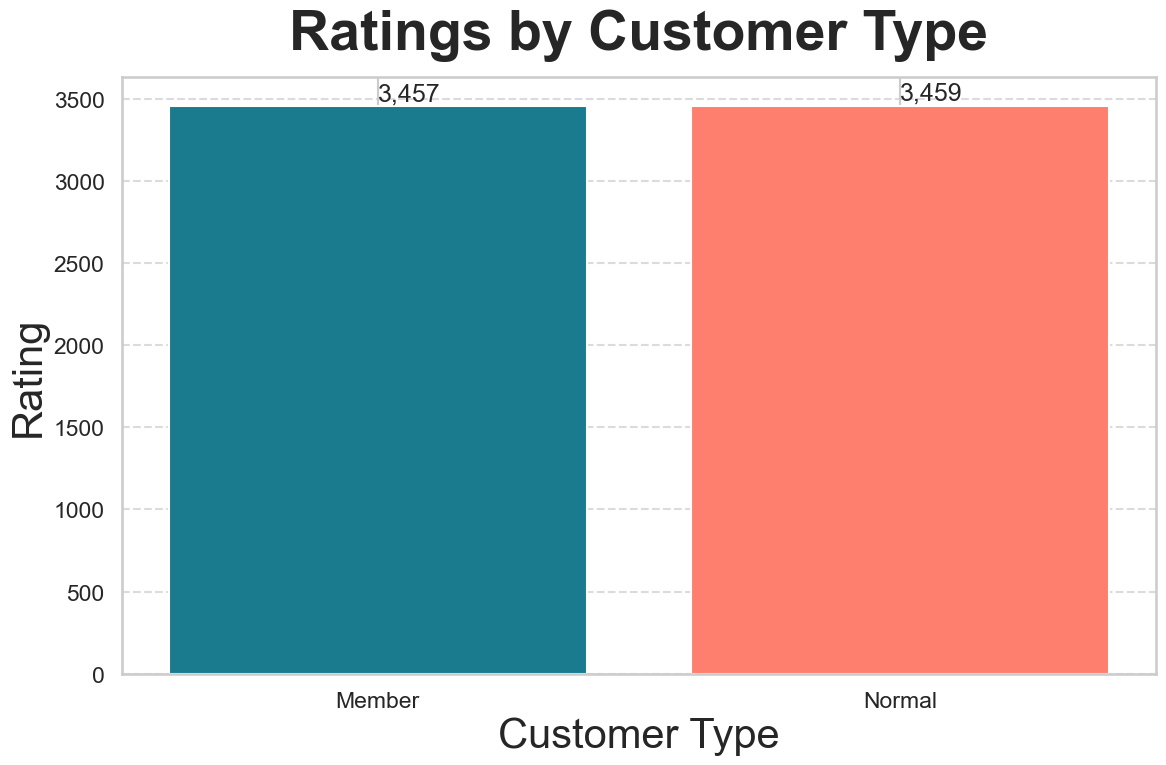

In [ ]:
customer_rating = no_more_outlier.groupby('Customer_Type')['Rating'].sum().reset_index()
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
colors = ["#1A7B8F", "#FF7F6E"]
bars = ax.bar(customer_rating['Customer_Type'], customer_rating['Rating'], color = colors)
ax.grid(axis = 'y', alpha = 0.7, linestyle = '--')
ax.set_xlabel("Customer Type", fontsize = 30)
ax.set_ylabel("Rating", fontsize = 30)
ax.set_title("Ratings by Customer Type", fontsize = 40, pad = 20, fontweight = 'bold')
for bar in bars:
     height = bar.get_height()
     width = bar.get_width()/2
     ax.text(bar.get_x() + width, height + (height * 0.01), f"{int(height):,}")
fig.tight_layout()
plt.show()

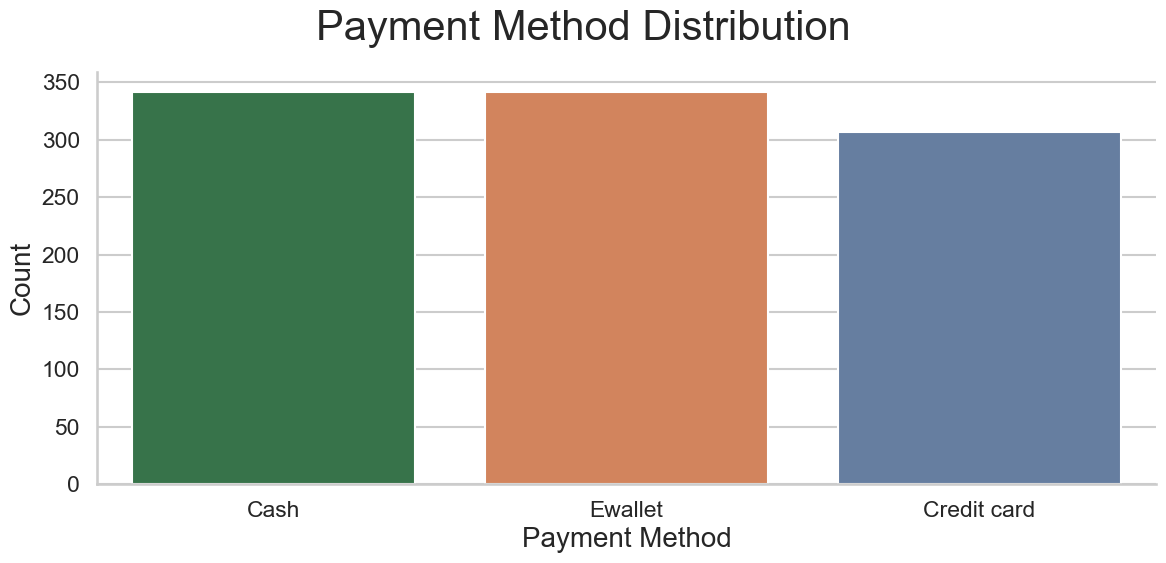

In [50]:
g = sns.catplot(x = 'Payment', data = no_more_outlier, kind = 'count', aspect = 2, height = 6, hue = 'Payment', 
                palette = ["#2D7D46", "#E67E49", "#5C7DAA"])
g.fig.suptitle("Payment Method Distribution", fontsize = 30, y = 0.95)
g.set_xlabels("Payment Method", fontsize = 20)
g.set_ylabels("Count", fontsize = 20)
g.tight_layout()
plt.show()

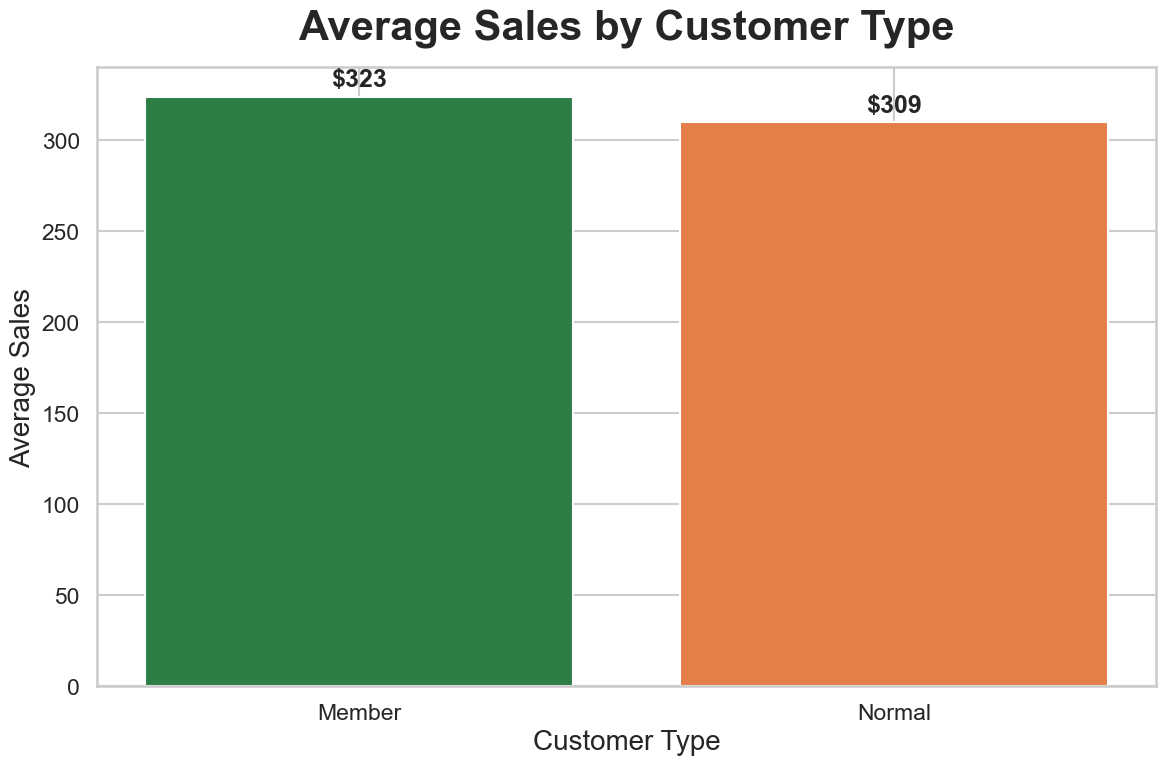

In [71]:
customer_sales = no_more_outlier.groupby('Customer_Type')['Total'].mean().reset_index()
customer_sales
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
bars = ax.bar(customer_sales['Customer_Type'], customer_sales['Total'], color = ["#2D7D46", "#E67E49"])
for bar in bars:
     height = bar.get_height()
     width = bar.get_width()/2
     ax.text(bar.get_x() + width, height + (height * 0.01), f"${int(height):,}", ha = 'center', va = 'bottom', fontweight = 'bold')
ax.set_ylabel("Average Sales", fontsize = 20)
ax.set_xlabel("Customer Type", fontsize = 20)
ax.set_title("Average Sales by Customer Type", fontsize = 30, pad = 20, fontweight = 'bold')
fig.tight_layout()
plt.show()